# End of semester review lab

**Instructions**

This lab is designed to be a review of some of the key concepts and coding from the second half of the semester.

Your task is to predict the wage in the following data set using all of the available features.  You should do this using two separate models, and compare which model has the lowest RMSE (Root Mean Squared Error).  The two models you should use are linear regression and K-nearest neighbor, with K = 1.  Note that we are using K nearest neighbor in a new way because this is not a classification problem.  The K-nearest neighbor should simply use the nearest neighbor's wage as the prediction wage.

You will need to follow these steps

## 1. Setup
Run the two cells below to load the packages and data.

The dataset CPS85 contains data on 534 individuals surveyed in the year 1985.

    wage = The hourly wage
    educ = years of education
    sex = sex (male or female)
    exper = years of experience
    union = whether or not the person was in a union

In [211]:
! pip install datascience
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline

In [212]:
CPS85 = Table.read_table("CPS85_small.csv")
CPS85

wage,educ,sex,exper,union
9,10,M,27,Not
5.5,12,M,20,Not
3.8,12,F,4,Not
10.5,12,F,29,Not
15,12,M,40,Union
9,16,F,27,Not
9.57,12,F,5,Union
15,14,M,22,Not
11,8,M,42,Not
5,12,F,14,Not


**Step 1: Data Preparation**
1. You can't fit a model with categorical data the such as sex and union as text.  You will need to convert those columns into numbers.  Fortunately since both are binary variables, you just need to convert M to 1 and F to 0, and Union to 1 and Not to 0.

2. Convert each column to standard units

3. Save the cleaned data as CPS85_clean

4. Create a train/test split with 70% of the data for training and 30% for testing.  Use a random seed of 1234 so that we all get the same results when we do the train test split.  There should be 374 training observations and 160 test observations.  Name the resulting data sets train and test.  




In [213]:
def sex_to_b(text):
    if text == 'M':
        return 1
    else: 
        return 0

In [214]:
def union_to_b(text):
    if text == 'Union':
        return 1
    else: 
        return 0

In [215]:
CPS85_clean = (CPS85
    .with_column('sex', CPS85.apply(sex_to_b, 'sex'))
    .with_column('union', CPS85.apply(union_to_b, 'union'))
)
CPS85_clean

wage,educ,sex,exper,union
9,10,1,27,0
5.5,12,1,20,0
3.8,12,0,4,0
10.5,12,0,29,0
15,12,1,40,1
9,16,0,27,0
9.57,12,0,5,1
15,14,1,22,0
11,8,1,42,0
5,12,0,14,0


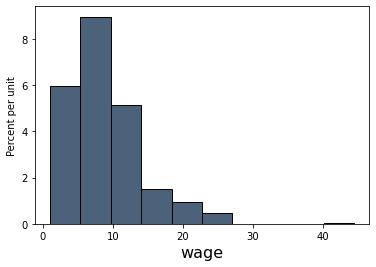

In [216]:
CPS85_clean.select('wage').hist() #notice the wage is not normally distributed

In [218]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

In [222]:
CPS85_su = (
    CPS85_clean.with_column('wage', standard_units(CPS85_clean.column('wage'))).
    with_column('educ', standard_units(CPS85_clean.column('educ'))).
    with_column('sex', standard_units(CPS85_clean.column('sex'))).
    with_column('exper', standard_units(CPS85_clean.column('exper'))).
    with_column('union', standard_units(CPS85_clean.column('union')))
)


In [223]:
CPS85_su

wage,educ,sex,exper,union
-0.00468686,-1.15531,0.920734,0.742062,-0.468165
-0.686379,-0.38988,0.920734,0.17609,-0.468165
-1.01749,-0.38988,-1.08609,-1.11756,-0.468165
0.287467,-0.38988,-1.08609,0.903768,-0.468165
1.16393,-0.38988,0.920734,1.79315,2.136
-0.00468686,1.14097,-1.08609,0.742062,-0.468165
0.106332,-0.38988,-1.08609,-1.03671,2.136
1.16393,0.375546,0.920734,0.337796,-0.468165
0.384851,-1.92073,0.920734,1.95486,-0.468165
-0.783764,-0.38988,-1.08609,-0.309028,-0.468165


In [224]:
#this does the train test split and makes sure we will al have the same results by setting the random seed
np.random.seed(1234)
shuffled = CPS85_su.sample(with_replacement=False) # Randomly permute the rows
train = shuffled.take(np.arange(374))
test  = shuffled.take(np.arange(374, CPS85_su.num_rows))

In [225]:
train#your train and test data should look exactly like this if you set the seed correctly

wage,educ,sex,exper,union
-0.0533792,-0.38988,0.920734,-0.713294,-0.468165
0.579621,0.375546,-1.08609,-0.632441,-0.468165
2.21568,1.52369,0.920734,-1.19841,-0.468165
0.77439,-0.38988,0.920734,0.580356,2.136
-0.102071,-0.38988,0.920734,-0.389881,-0.468165
-0.394225,-0.38988,-1.08609,-0.632441,2.136
-0.910364,-0.772593,-1.08609,0.17609,-0.468165
-0.588994,-2.30345,-1.08609,-0.228175,-0.468165
-0.199456,-0.38988,-1.08609,-0.794147,-0.468165
0.190082,-1.15531,-1.08609,0.580356,2.136


In [226]:
test

wage,educ,sex,exper,union
0.384851,-1.92073,0.920734,1.95486,-0.468165
-1.10513,-0.00716691,-1.08609,-1.27927,-0.468165
-0.242305,1.14097,-1.08609,-0.955853,-0.468165
-0.540302,-0.38988,-1.08609,-0.955853,-0.468165
0.912676,-0.38988,0.920734,2.03571,2.136
-1.10513,-0.38988,-1.08609,-0.794147,-0.468165
0.793867,-1.15531,-1.08609,1.63145,-0.468165
1.74824,1.14097,0.920734,1.63145,-0.468165
0.579621,1.9064,-1.08609,0.014384,2.136
-1.01749,-0.38988,-1.08609,-1.11756,-0.468165


# Regression Model 

**Step 2: Regression Model** 

1. Define a function that calculates the root mean squared error of a regression model that predicts the wage using all other features.  Note: You have only done this before with one 'x' variable.  Now there are more than one.  All you have to do is to add a 'slope' for each variable. For example the mathematical equation for the predicted value is:

$fitted = slope_1*educ + slope_2*sex + slope_3*exper + slope_4*union + intercept$

Once you have the fitted value for each data point, you can use it to calculate the RMSE for the model

*Hint* This [example from the textbook](https://umass-data-science.github.io/190fwebsite/textbook/15/3/method-of-least-squares/) should help you.  This was also in the last lab we did.

2. Use the minimize function to find the slopes and intercept that minimize the the RMSE.  These slopes and intercepts are your model, and the RMSE that these slopes give you is the *training RMSE of your model*

In [227]:
#The purpose of this cell is to show you that you can calculate an RMSE with any numbers you want to assign
#to the slopes and intercept.  In this case we chose, 1,2,3,4,5.
#you don't actually need this cell it is just to show you what is happening
e = train.column('educ')
s = train.column('sex')
ex = train.column('exper')
u = train.column('union')
w = train.column('wage')
fitted = 1 * e + 2 * s + 3* ex + 4 * u + 5#fitted is an array of predicted wages using 1,2,3,4,5 as regression coefficients
rmse = np.sqrt(np.mean((fitted - w)**2))#this is the RMSE of the model fit to the training data  
rmse
    

7.524586345584984

In [231]:
#this cell does the same thing as above expect the regression coefficients are the arguments in a function
def rmse(slope1, slope2, slope3, slope4, intercept):
    e = train.column('educ')
    s = train.column('sex')
    ex = train.column('exper')
    u = train.column('union')
    w = train.column('wage')
    fitted = slope1 * e + slope2 * s + slope3 * ex + slope4 * u + intercept
    rmse = np.sqrt(np.mean((fitted - w) ** 2))
    return rmse

In [232]:
rmse(1,2,3,4,5)#this call the function using the coefficients from two cells above (1,2,3,4,5)
#the purpose is to show show that the rmse of your function call and the manual calculation using (1,2,3,4,5) are
#the same

7.524586345584984

In [233]:
#this cell uses the minimize function to find the arguments of the rmse function that minimize the rmse.
#the resulting array contains the "correct" regression coefficients that minimize RMSE.
model_coefs = minimize(rmse)
model_coefs#these "slopes" minimize the RMSE

array([ 0.47257517,  0.19613833,  0.23924993,  0.09287847, -0.00341792])

**Step 3: Calculate test set RMSE**

1.  Use the slopes and intercept you calculated from your training data to predict the wage of each observation in your test set.

2.  Calculate the RMSE of those predictions.  This is the *test set RMSE of your model*.

In [234]:
#define a function to calculate test set RMSE notice we use test set here
def rmse_test(slope1, slope2, slope3, slope4, intercept):
    e = test.column('educ')
    s = test.column('sex')
    ex = test.column('exper')
    u = test.column('union')
    w = test.column('wage')
    fitted = slope1 * e + slope2 * s + slope3 * ex + slope4 * u + intercept
    rmse = np.sqrt(np.mean((w - fitted) ** 2))
    return rmse

In [235]:
model_coefs[0]#this shows you that you can extract elements of the model_coefs array using []

0.47257516876928146

In [237]:
#RMSE of test set
#this calls the rmse_test function using the "correct" regression coefficients.
rmse_test(model_coefs[0], model_coefs[1], model_coefs[2], model_coefs[3], model_coefs[4])

0.8337656895236845

In [88]:
#RMSE of training set.
#notice the RMSE of the training set is better than the test set.  This makes sense because we fit the model to 
#the training data.  Test set errors should be larger because they were not included in finding the optimal coeficients
rmse(model_coefs[0], model_coefs[1], model_coefs[2], model_coefs[3], model_coefs[4])

0.8681180706812573

# K-nearest Neighbor Model

Note you should use the same training and test data for this model as you did for the regression.

1. Create a function or series of functions that finds the nearest neighbor in the training data of a single row of data.

*hint:* These function are explained in the textbook.  You want the closest() function to work.  You don't need the majority_class or classify functions because this is not a classification problem.








In [242]:
 def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

def distances(train, example):
    """Compute distance between example and every row in train.
    Return train augmented with Distance column"""
    distances = make_array()
    attributes = train.drop('Class')
    for row in attributes.rows:
        distances = np.append(distances, row_distance(row, example))
    return train.with_column('Distance', distances)

def closest(train, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(train, example).sort('Distance').take(np.arange(k))

In [243]:
test.row(0)#this pulls out row 0 as a row, you can turn this to an array, which is what the row_distances function does

Row(wage=0.3848514857624287, educ=-1.9207329501703343, sex=0.9207338730881488, exper=1.9548578101521867, union=-0.4681645887845222)

2.  Use you function to find the nearest neighbor (k=1) in the training set of each observation in the test set.  The value of the nearest neighbor's wage in the training set is the prediction of the value of wage for the test observation.

In [244]:
predicted_wage = closest(train, test.row(0), 1)
predicted_wage[0][0]

-0.10207144793689596

In [245]:
#this finds the nearest neighbor of every row in the test set
predicted_wage_array = make_array()
for i in np.arange(test.num_rows):
    predicted_wage = closest(train, test.row(i), 1)[0][0]#this chooses the wage of the nearest neighbor
    predicted_wage_array = np.append(predicted_wage_array, predicted_wage)

3.  Calculate the RMSE of the predicted wage using your nearest neighbor prediction.  This is the RMSE of your nearest neighbor model

In [246]:
np.sqrt(np.mean((predicted_wage_array - test.column('wage'))**2))

0.21843223870545

**Results:** What are the RMSEs of your two models?  Which one has a lower RMSE on the test set? 

RMSE of the linear regression model is .83, RMSE of the nearest neighbor model is .21, so the nearest neighbor model has a lower test set error